In [188]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings
import glob

# Gathering 

In [189]:
WeRateDogs_archive = pd.read_csv('twitter-archive-enhanced.csv')
WeRateDogs_archive.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

We have 2356 entries in WeRateDogs Archive.
17 columns are provided as part of the dataset.

In [190]:
WeRateDogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [191]:
url=" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [192]:
# Reading tweet-json.txt file, line by line and append it to "status" list
with open('tweet-json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

#using json_normalize to convert json keys to columns 
from pandas.io.json import json_normalize
df_json = pd.DataFrame.from_dict(json_normalize(status), orient='columns')

# Refining the the json dataframe to the columns we need for analysis
columns_needed = ['id' , 'retweet_count' , 'favorite_count']
df_json_cleaned = df_json[columns_needed]



df_json_cleaned.rename(columns = {'id':'tweet_id'} , inplace=True)

df_json_cleaned.head()


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing 

In [193]:
WeRateDogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [194]:
WeRateDogs_archive.tweet_id.nunique()
print("All IDs are unique")

All IDs are unique


In [195]:
print (WeRateDogs_archive.source.value_counts())
print("\n No twiiter for Android ?!! Weird Hah :) ")

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

 No twiiter for Android ?!! Weird Hah :) 


In [196]:
#This is to see full text and assessing the data deeply ;)
pd.set_option('display.max_colwidth', -1)

#Here we want to see if there is another way of calling a dog name other than "This is"
WeRateDogs_archive[~WeRateDogs_archive['text'].str.contains("This is" , case=False)]




,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control o

## People usualy (from tweets) call their dogs on the following ways:

 - This is 
 - Meet 
 - Here is 
 - Here's 
 - Named 
 - His name is 
 
 Let's see if the previous calls exist in a tweet text and no name is stated for that

In [197]:
print("Approximate number of tweets with name in a text is")
(WeRateDogs_archive[WeRateDogs_archive['text'].str.contains("This is|meet|here is|here's|named|his name is" , case=False)]).count()[0]


Approximate number of tweets with name in a text is


1609

In [198]:
print("Number of tweets with names (Not equal to \"None\")")
(WeRateDogs_archive[~WeRateDogs_archive['name'].str.contains("None" , case=False)]).count()[0]

Number of tweets with names (Not equal to "None")


1611

In [199]:
print("Number of tweets with name less than 2 characters long, not real name ")

(WeRateDogs_archive[WeRateDogs_archive['name'].str.len() < 2]).count()[0]


Number of tweets with name less than 2 characters long, not real name 


56

In [200]:
print("Sort data by names\n we can see more unmeanningful names ( Not real, propably :\ )")
WeRateDogs_archive.name.sort_values()

Sort data by names
 we can see more unmeanningful names ( Not real, propably :\ )


1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [201]:
print("Names with lower case, not real name as well")
(WeRateDogs_archive.loc[(WeRateDogs_archive['name'].str.islower())]).count()[0]


Names with lower case, not real name as well


109

In [202]:
print("Showing text with (Name call) phrases and has lower case name")
WeRateDogs_archive.loc[(WeRateDogs_archive['name'].str.islower()) & (WeRateDogs_archive['text'].str.contains("This is|meet|here is|here's|named|his name is" , case=False))]

Showing text with (Name call) phrases and has lower case name


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [232]:
print("To show tweets with rating in decimals, we can see nominator is not matching the actual text rating .. I got shocked :o")
rating_columns = ['text' , 'rating_numerator' , 'rating_denominator']
WeRateDogs_archive[WeRateDogs_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][rating_columns]

To show tweets with rating in decimals, we can see nominator is not matching the actual text rating .. I got shocked :o


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [204]:
print("From the below results, 10 is not the only scale we have in the data. We have big numbers which makes it unreliable for analysis.")
WeRateDogs_archive[WeRateDogs_archive.text.str.contains(r"(\d+\/\d+)") & (WeRateDogs_archive.rating_denominator > 10)][rating_columns]

From the below results, 10 is not the only scale we have in the data. We have big numbers which makes it unreliable for analysis.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


## Now let's check image prediction dataframe

In [205]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [206]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [207]:
print("Number of tweets in WeRateDogs that doesn't have an image in image_predictions dataframe is:")
WeRateDogs_archive.count()[0] - pd.merge(WeRateDogs_archive, image_predictions, on=['tweet_id'] , how='inner').count()[0]

Number of tweets in WeRateDogs that doesn't have an image in image_predictions dataframe is:


281

In [208]:
print("No image URL is null")
image_predictions[image_predictions.jpg_url.isnull()]

No image URL is null


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [209]:
print("Expanded URLs means tweet image. The number of tweets with no expanded URLs provided is: ")
WeRateDogs_archive.expanded_urls.isnull().sum()

Expanded URLs means tweet image. The number of tweets with no expanded URLs provided is: 


59

## Quality issues:
- Tweets with wrong rating numerator because of decimal number in text.
- Dog names with less than 2 letter.
- Dog names with lower-case ( Not real or wrong ).
- Dog names with inappliacable names ( e.g. "The" , "a" ).
- Missing dog stage values ( All None ).
- inconsistent denominator rating ( 150 , 120 , 130 ).
- inadequate datatypes (timestamp)
- Tweets with no expanded URLs.


## Tidiness issues:
- Dogs stages in different columns, better to be unified in one columns called Dog_Stage.
- Merge all 3 dataframes into one.

# Cleaning

In [210]:
# Don't play with the original data, let's make a copy 

copy_WeRateDogs_archive = WeRateDogs_archive.copy()
copy_image_predictions = image_predictions.copy()
copy_retweet_like = df_json_cleaned.copy()    


## Tidiness issue 1 - One column for Dog_stage:

In [211]:
#First, I will start with the dog stages and collapse them all into one columns.

copy_WeRateDogs_archive['Dog_stage'] = copy_WeRateDogs_archive['text'].str.extract('(doggo|flooter|pupper|puppo)', flags=re.IGNORECASE , expand=True)

copy_WeRateDogs_archive.Dog_stage.isnull().count()

2356

## Tidiness issue 2 - Merge needed columns from the 3 dataframes into copy_WeRateDogs_archive :

In [212]:
copy_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [213]:
copy_WeRateDogs_archive = pd.merge(copy_WeRateDogs_archive, copy_image_predictions, on='tweet_id', how='inner')

copy_WeRateDogs_archive = pd.merge(copy_WeRateDogs_archive, copy_retweet_like, on='tweet_id', how='inner')

copy_WeRateDogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
Dog_stage                     349 n

In [214]:
columns_of_interest = ['tweet_id' , 'timestamp' , 'source' , 'text' , 'expanded_urls' , 'rating_numerator' , 'rating_denominator' , 'name' , 'Dog_stage' , 'retweet_count' , 'favorite_count']
copy_WeRateDogs_archive[columns_of_interest].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,9774,41048


In [217]:
print("Drop empty expanded URLs")
copy_WeRateDogs_archive.dropna(subset=['expanded_urls'] , inplace=True)


Drop empty expanded URLs


In [218]:
print("check and clean rating outliers")
wrong_deno_indexes = copy_WeRateDogs_archive[copy_WeRateDogs_archive.rating_denominator != 10].index
wrong_deno_indexes

check and clean rating outliers


Int64Index([ 345,  415,  734,  876,  924,  967, 1001, 1022, 1047, 1065, 1131,
            1207, 1379, 1380, 1405, 1512, 1571, 2052],
           dtype='int64')

In [219]:
print(copy_WeRateDogs_archive.tweet_id.count())
copy_WeRateDogs_archive.drop(wrong_deno_indexes , inplace=True)
print(copy_WeRateDogs_archive.tweet_id.count())


2073
2055


In [221]:
print("removing retweets tweets")
print("We have {} retweets in the dataframe".format (  (copy_WeRateDogs_archive[~copy_WeRateDogs_archive.retweeted_status_id.isnull()]).count()[0] ) )

copy_WeRateDogs_archive = copy_WeRateDogs_archive[copy_WeRateDogs_archive.retweeted_status_id.isnull()]

print("Now, we have {} retweets in the dataframe".format (  (copy_WeRateDogs_archive[~copy_WeRateDogs_archive.retweeted_status_id.isnull()]).count()[0] ) )


removing retweets tweets
We have 79 retweets in the dataframe
Now, we have 0 retweets in the dataframe


In [226]:
print("There are {} tweets with lower-case dog name ".format( (copy_WeRateDogs_archive.loc[(copy_WeRateDogs_archive['name'].str.islower())]).count()[0] )  )

copy_WeRateDogs_archive.drop(  (copy_WeRateDogs_archive.loc[(copy_WeRateDogs_archive['name'].str.islower())]).index , inplace=True)

print("Now, there are {} tweets with lower-case dog name ".format( (copy_WeRateDogs_archive.loc[(copy_WeRateDogs_archive['name'].str.islower())]).count()[0] )  )


There are 0 tweets with lower-case dog name 
Now, there are 0 tweets with lower-case dog name 


In [227]:
copy_WeRateDogs_archive.name.sort_values()

836     Abby        
847     Abby        
768     Ace         
1656    Acro        
1109    Adele       
1657    Aiden       
66      Aja         
383     Akumi       
663     Al          
711     Albert      
1676    Albert      
328     Albus       
120     Albus       
919     Aldrick     
1767    Alejandro   
298     Alexander   
991     Alexanderson
388     Alf         
1956    Alfie       
291     Alfie       
695     Alfie       
1364    Alfie       
46      Alfy        
161     Alice       
1441    Alice       
1259    Amber       
1116    Ambrose     
1799    Amy         
1914    Amélie      
629     Anakin      
         ...        
636     Winnie      
212     Winnie      
1558    Winston     
808     Winston     
324     Winston     
1854    Winston     
1036    Winston     
660     Winston     
225     Winston     
452     Winston     
713     Wishes      
1221    Wyatt       
145     Wyatt       
326     Wyatt       
1155    Yoda        
38      Yogi        
497     Yogi 

In [231]:
print("There are/is {} name(s) with less than 2 characters ".format(   (copy_WeRateDogs_archive[copy_WeRateDogs_archive['name'].str.len() < 2]).count()[0] ) )
copy_WeRateDogs_archive.drop(  (copy_WeRateDogs_archive[copy_WeRateDogs_archive['name'].str.len() < 2]).index , inplace=True)
print("Now, there are/is {} name(s) with less than 2 characters ".format(   (copy_WeRateDogs_archive[copy_WeRateDogs_archive['name'].str.len() < 2]).count()[0] ) )


There are/is 1 name(s) with less than 2 characters 
Now, there are/is 0 name(s) with less than 2 characters 


In [278]:
decimal_texts = (copy_WeRateDogs_archive[copy_WeRateDogs_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'] ).str.extract(r"(\d+\.\d*\/\d+)")
decimal_texts

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


40      13.5/10 
558     9.75/10 
614     11.27/10
1451    11.26/10
Name: text, dtype: object

In [287]:
print("Let's correct decimal rating values.")
for key,value in decimal_texts.items():
    #print("value {} {}".format( key, value.split("/")[0] ))
    print("Rating numerator before {}\n".format( copy_WeRateDogs_archive.loc[key]['rating_numerator'] ))
    copy_WeRateDogs_archive.loc[key , 'rating_numerator'] = value.split("/")[0]
    print("Rating numerator After {}\n".format( copy_WeRateDogs_archive.loc[key]['rating_numerator'] ))


Let's correct decimal rating values.
Rating numerator before 13.5

Rating numerator After 13.5

Rating numerator before 9.75

Rating numerator After 9.75

Rating numerator before 11.27

Rating numerator After 11.27

Rating numerator before 11.26

Rating numerator After 11.26



In [288]:
print("Change timestamp column type")
copy_WeRateDogs_archive['timestamp'] = pd.to_datetime(copy_WeRateDogs_archive['timestamp'])


Change timestamp column type


In [295]:

copy_WeRateDogs_archive['rating_numerator'] = copy_WeRateDogs_archive['rating_numerator'].astype('float')
copy_WeRateDogs_archive['rating_denominator'] = copy_WeRateDogs_archive['rating_denominator'].astype('float')

In [289]:
print("Save the cleaned dataframe to csv file")
copy_WeRateDogs_archive.to_csv('copy_WeRateDogs_archive.csv')


Save the cleaned dataframe to csv file


# Analysing 

In [294]:
columns_of_interest = ['timestamp' , 'source', 'rating_numerator' , 'rating_denominator' , 'name' , 'Dog_stage' , 'retweet_count' , 'favorite_count']
copy_WeRateDogs_archive[columns_of_interest].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 2072
Data columns (total 8 columns):
timestamp             1880 non-null datetime64[ns]
source                1880 non-null object
rating_numerator      1880 non-null object
rating_denominator    1880 non-null int64
name                  1880 non-null object
Dog_stage             314 non-null object
retweet_count         1880 non-null int64
favorite_count        1880 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 212.2+ KB


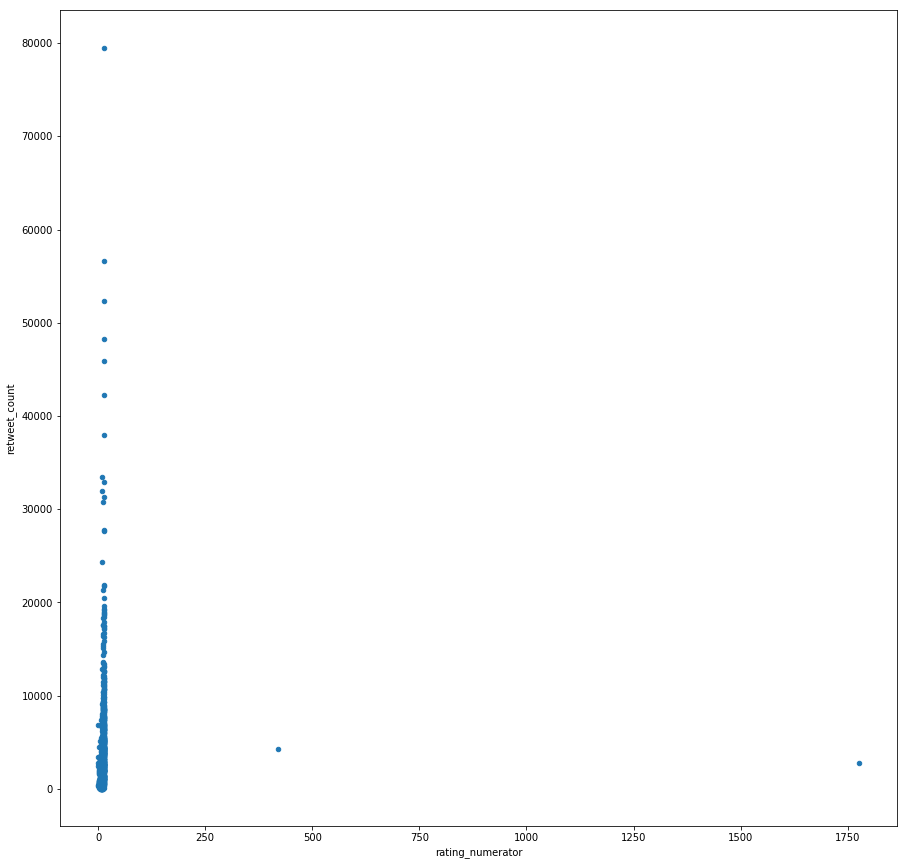

In [296]:
copy_WeRateDogs_archive.plot(title='', x='rating_numerator', y='retweet_count' , kind='scatter', figsize=(15,15));

It looks like that we found co